<a href="https://colab.research.google.com/github/blhprasanna99/speech_emotion_detection/blob/master/emotion_spectogram_CNN_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soundfile
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=60032c059122948caadde668618d7a13c8e8f9c930286ec5ca56013d3c682839
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2 #to preprocess images(open cv)
import os #to access file directories
import numpy as np # to deal with multidimensional matrices
from random import shuffle 
from tqdm import tqdm
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

'''Setting up the env'''
  

IMG_SIZE = 150
LR = 1e-3

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

In [ ]:
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display
import numpy as np

#to play audio
import IPython.display as ipd

audio_fpath = "/content/drive/MyDrive/ML_project/audio_speech_actors_01-24/Actor_01"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  120


In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/ML_project/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(145676,) 44100


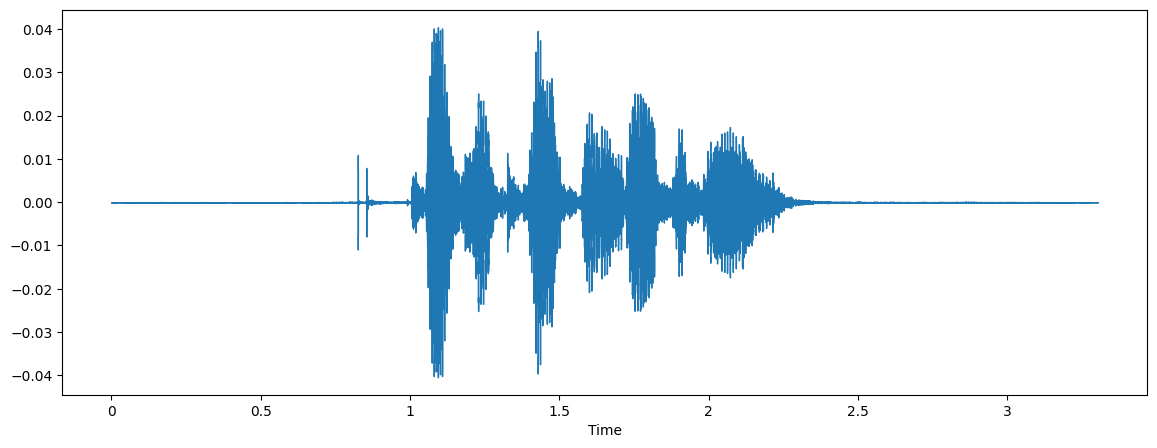

In [ ]:
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

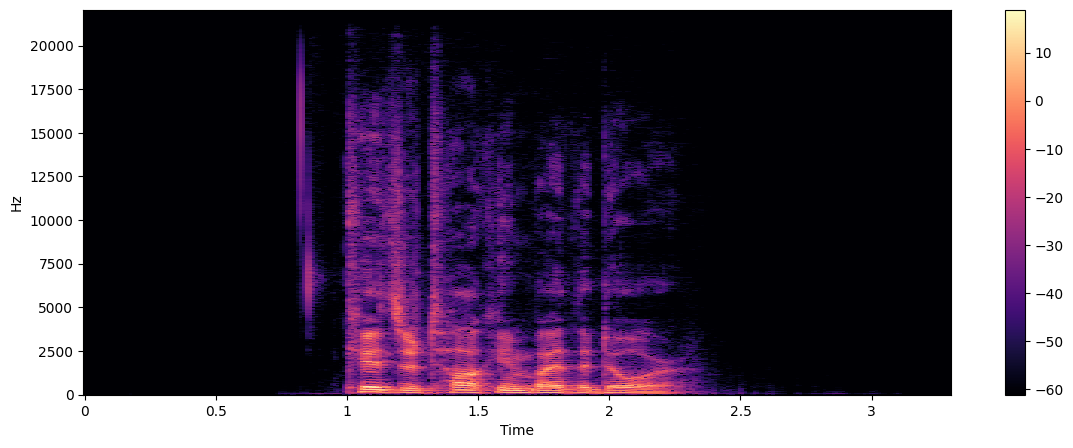

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

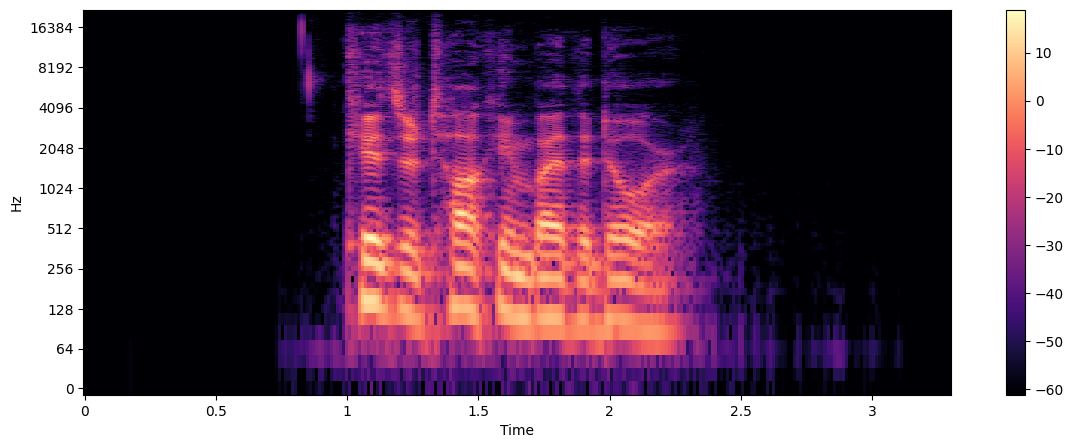

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

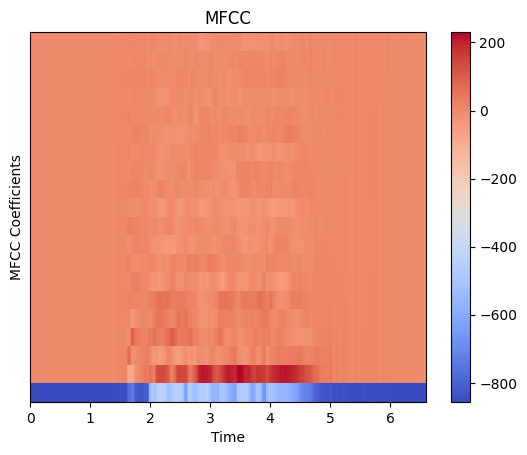

In [ ]:


# Compute the MFCC features
mfccs = librosa.feature.mfcc(y=x, sr=sr)

# Display the MFCC features
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()


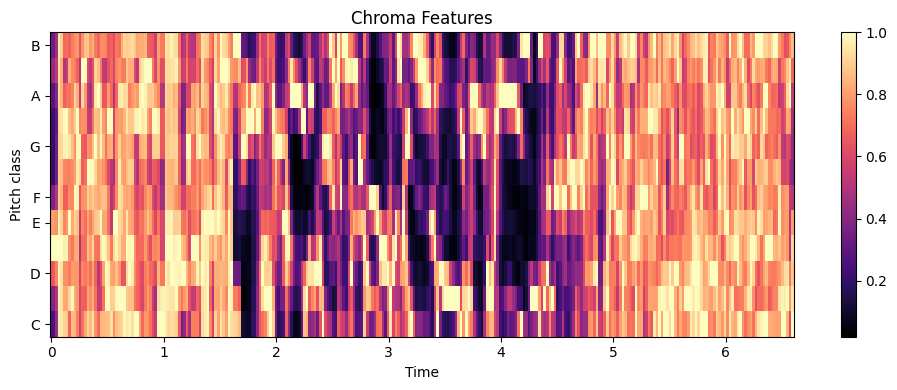

In [ ]:
chroma = librosa.feature.chroma_stft(y=x, sr=sr)

# Display the chroma features
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Features')
plt.tight_layout()
plt.show()

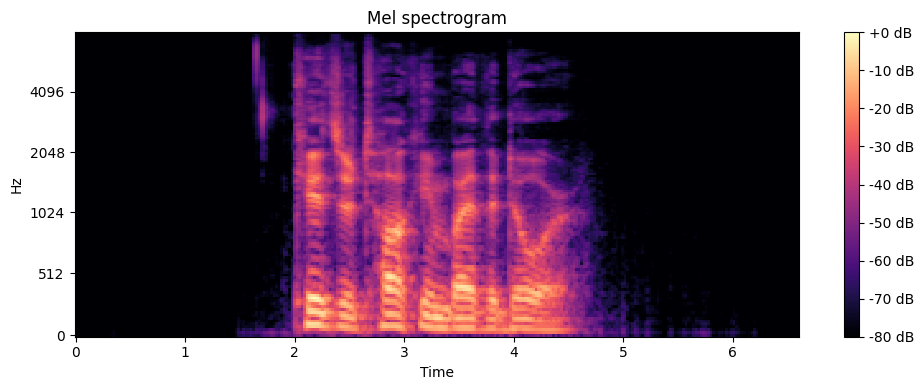

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)

# Step 4: Visualize the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:523: ComplexWarning: Casting complex values to real discards the imaginary part
  valley[..., k, :] = np.mean(sortedr[..., :idx, :], axis=-2)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:524: ComplexWarning: Casting complex values to real discards the imaginary part
  peak[..., k, :] = np.mean(sortedr[..., -idx:, :], axis=-2)


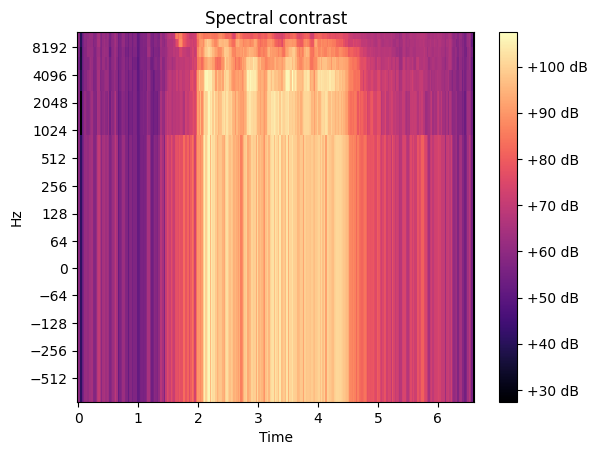

In [ ]:
spec = librosa.stft(x)

# Compute the contrast spectrogram
contrast = librosa.feature.spectral_contrast(S=spec, sr=sr)

# Display the contrast spectrogram
librosa.display.specshow(contrast, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectral contrast')
plt.show()


